# Metody Obliczeniowe w Nauce i Technice
## Laboratorium 13
### Minimalizacja funkcji
#### Mateusz Surjak

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import math
import random

**Algorytm symulowanego wyżarzania** jest to rodzaj algorytmu heurystycznego przeszukującego przestrzeń alternatywnych rozwiązań problemu w celu wyszukania rozwiązań najlepszych. Służy do przybliżonego znajdowania globalnego ekstremum funkcji zadanej na dyskretnej przesrzeni stanów.

Funkcje generujące punkty

In [2]:
def generate_points_uniform(n, size):
    return np.random.uniform((0, 0), (size, size), (n, 2))
    
def generate_points_normal(n, size):
    mu=(size//2, size//2)
    sigma=(5 * np.identity(2))
    return np.random.multivariate_normal(mu, sigma, n)

def generate_seperated(n, size):
    points = np.zeros((n, 2))
    possible_places = [x for x in range(0, 25)]
    sigma=(5 * np.identity(2))
    for i in range(9):
        place = random.choice(possible_places)
        possible_places.remove(place)
        for k in range((i * n) // 9, ((i+1) * n) // 9):
            curr_mu = ((size / 5) * (place // 5) + size/10, (size / 5) * (place % 5) + size/10)
            points[k] = np.random.multivariate_normal(curr_mu, sigma, 1)
    np.random.shuffle(points)
    return points

In [3]:
class Simulated_Annealing: 

    """
    n - liczba punktów
    size - zakres z jakiego mają być losowane punkty - (0, size)
    dist - rozkład
    """
    def __init__(self,n,size,dist, consecutive_swap = False, arbitrary_swap = False):
        self.n = n
        self.size = size
        if dist == 'normal':
            self.points = generate_points_normal(self.n,self.size)
        elif dist == 'uniform':
            self.points = generate_points_uniform(self.n,self.size)
        else:
            self.points = generate_seperated(self.n,self.size)
            
        self.consecutive_swap = consecutive_swap
        self.arbitrary_swap = arbitrary_swap
        self.values = []
        self.result = None
        
    def set_arbitrary_swap(self, val):
        self.arbitrary_swap = val
        
    def set_consecutive_swap(self, val):
        self.consecutive_swap = val
        
    @staticmethod
    def vector_cost(p1,p2):
        return math.sqrt((p2[0]-p1[0])**2 + (p2[1]-p1[1])**2)
    
    def get_cost(self,tab):
        cost = 0
        for i in range(self.n):
            cost += Simulated_Annealing.vector_cost(tab[i], tab[(i + 1) % self.n])

        return cost
    """
    Funkcja wykonująca simmulated annealing
    """
    def annealing(self,temperature, multiplier, iterations):
        if self.consecutive_swap and self.arbitrary_swap:
            raise Exception("Nie można mieć ustawionych naraz consecutive swap i arbitrary swap")

        optimal = self.points.copy()

        min_cost = self.get_cost(optimal)
        self.values.append([0, min_cost])
        
        for i in range(iterations):
            
            if self.arbitrary_swap:
                p1 = random.randint(0, self.n - 1)
                p2 = random.randint(0, self.n - 1)
                while p1 == p2:
                    p2 = random.randint(0, self.n - 1)
            elif self.consecutive_swap:
                p1 = random.randint(0, self.n - 1)
                p2 = (p1 + 1) % self.n
            else:
                raise Exception("Ustaw consecutive albo arbitrary swap")


            new_points = optimal.copy()
    
            new_points[[p1, p2]] = new_points[[p2, p1]]

            new_cost = self.get_cost(new_points)

            if new_cost < min_cost or math.e ** ((min_cost - new_cost) / temperature) > random.random():
                optimal = new_points
                min_cost = new_cost
                self.values.append([i, new_cost])

            temperature *= multiplier

        self.values.append([iterations, min_cost])
        self.values = np.array(self.values)
        self.result = np.append(optimal,[optimal[0]], axis =0)
    """
    Funkcja czyszcząca wyniki ale zachowująca wygenerowane punkty
    """
    def clean(self):
        self.values = []
        self.result = None
        self.arbitrary_swap = False
        self.consecutive_swap = False
    
    """
    Funkcja rysująca wykres energii oraz drogę (TSP)
    """
    def draw_plot(self):
        if self.result is None:
            raise Exception("Pierw wykonaj funkcje annealing")
        txt = ""
        if self.arbitrary_swap:
            txt="Arbitrary swap"
        elif self.consecutive_swap:
            txt="Consecutive swap"

        fig, ax = plt.subplots(1, 2, figsize=(18, 7))
        fig.tight_layout(pad=3.0)


        ax[0].plot(self.result[:,0], self.result[:,1], 'b-', c = "#8c7f53")
        ax[0].scatter(self.result[:, 0], self.result[:, 1])
        ax[0].set_title("TSP")
        ax[0].set_xlabel("x")
        ax[0].set_ylabel("y")

        ax[1].plot(self.values[:,0], self.values[:,1], 'r-', c="#317ead")
        ax[1].set_title(f"{txt} cost = {self.values[-1,1]}")
        ax[1].set_xlabel("iterations")
        ax[1].set_ylabel("distance")

        plt.show()

    
    

### Przedstaw wizualizację otrzymanego rozwiązania dla 3 różnych wartości n oraz 3 różnych układów punktów w 2D

Zastosowałem arbitrary swap do zobrazowania działania. Od razu będę rysował wykres energii.

- N = 10
- rozkład jednostajny

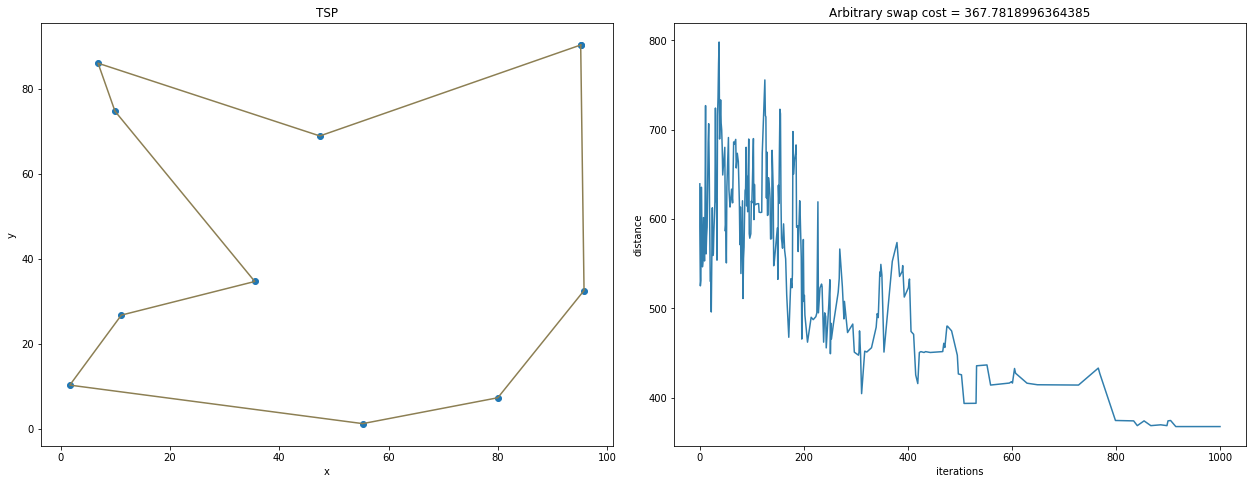

In [4]:
t_max = 100
multiplier = 0.996
iterations = 1000

a = Simulated_Annealing(10,100,'uniform')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 10
- rozkład normalny

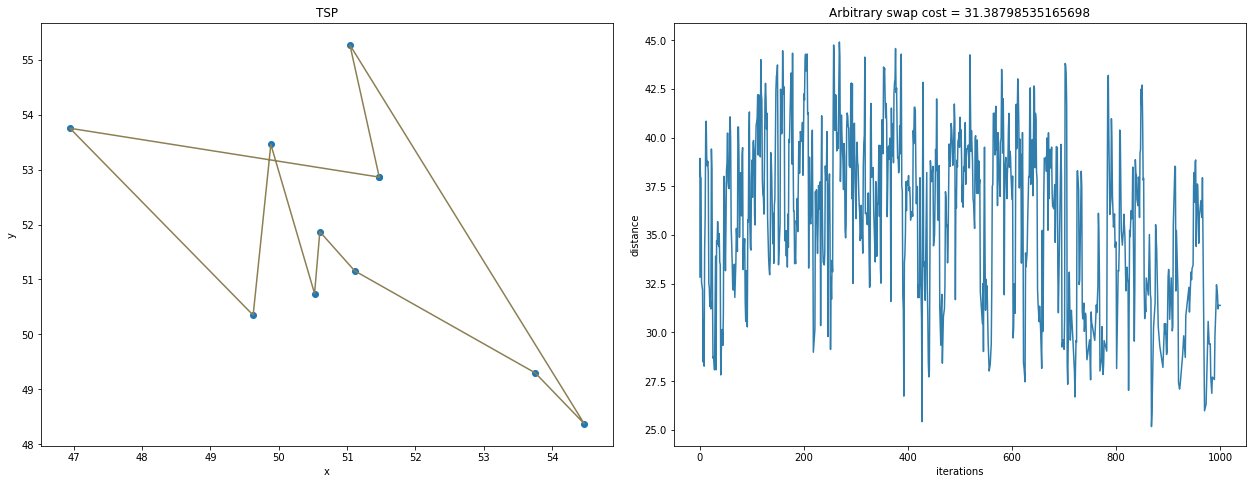

In [5]:
t_max = 100
multiplier = 0.996
iterations = 1000

a = Simulated_Annealing(10,100,'normal')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 10
- 9 grup punktów

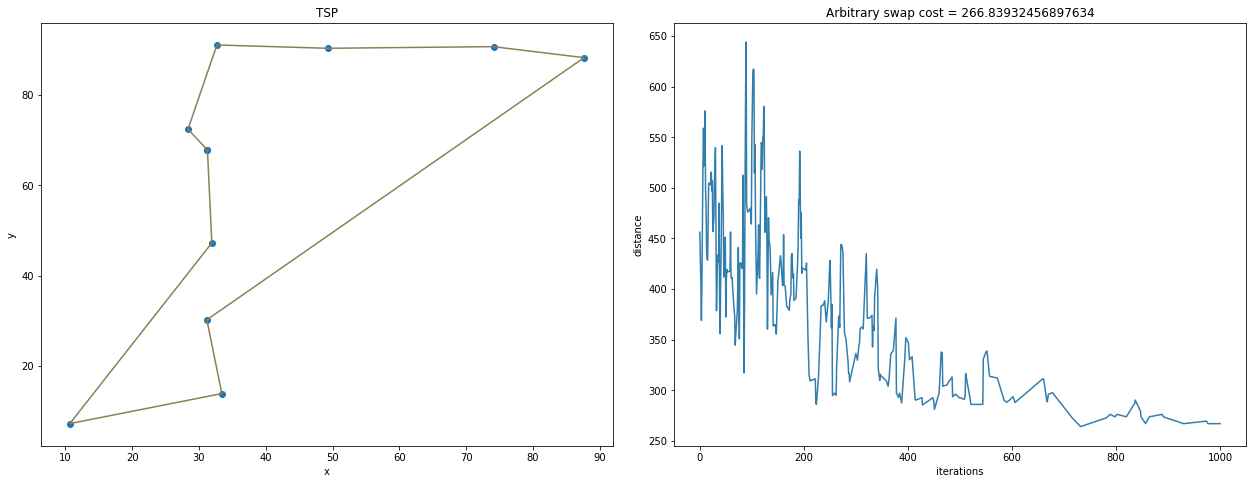

In [6]:
t_max = 100
multiplier = 0.996
iterations = 1000

a = Simulated_Annealing(10,100,'-----')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 20
- rozkład jednostajny

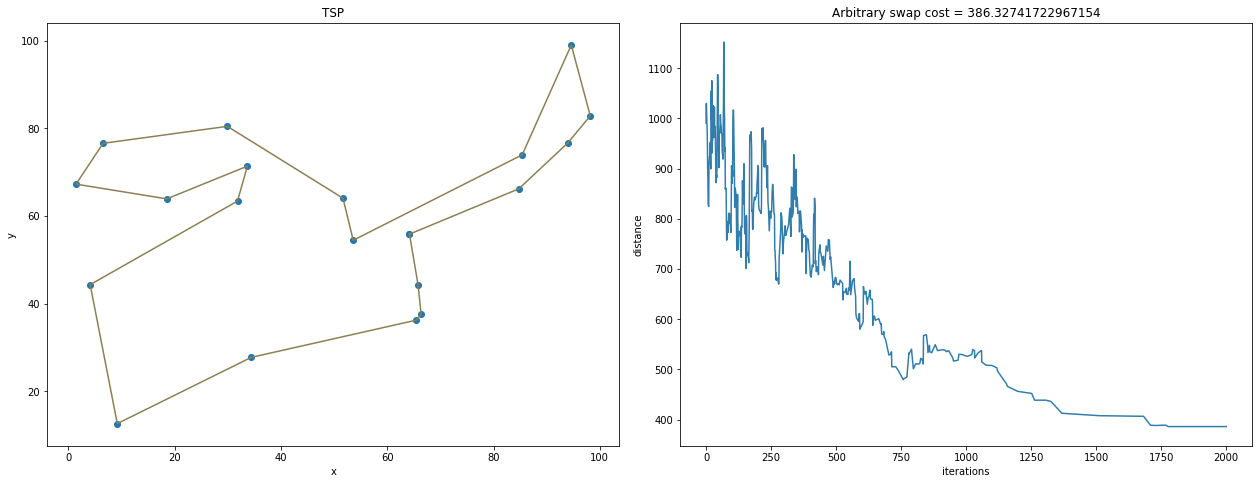

In [7]:
t_max = 100
multiplier = 0.997
iterations = 2000

a = Simulated_Annealing(20,100,'uniform')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 20
- rozkład normalny

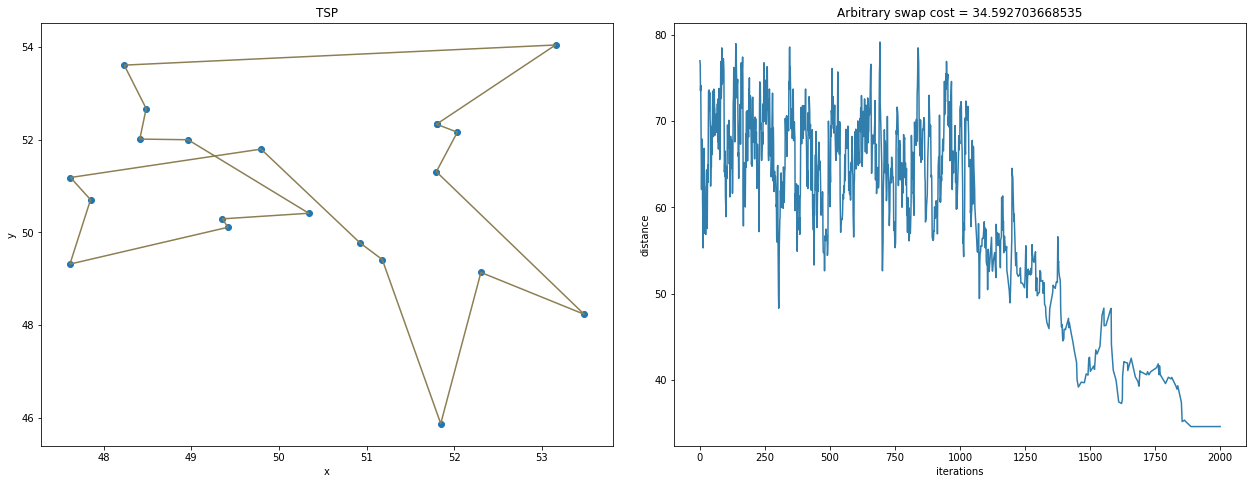

In [8]:
t_max = 100
multiplier = 0.997
iterations = 2000

a = Simulated_Annealing(20,100,'normal')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 20
- 9 grup punktów

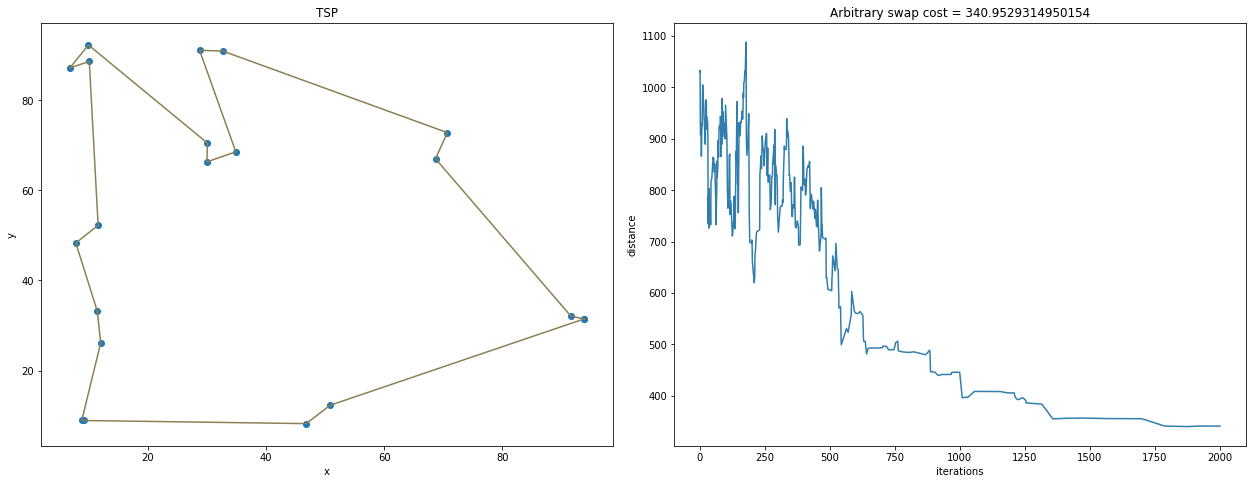

In [9]:
t_max = 100
multiplier = 0.997
iterations = 2000

a = Simulated_Annealing(20,100,'------')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 50
- rozkład jednostajny

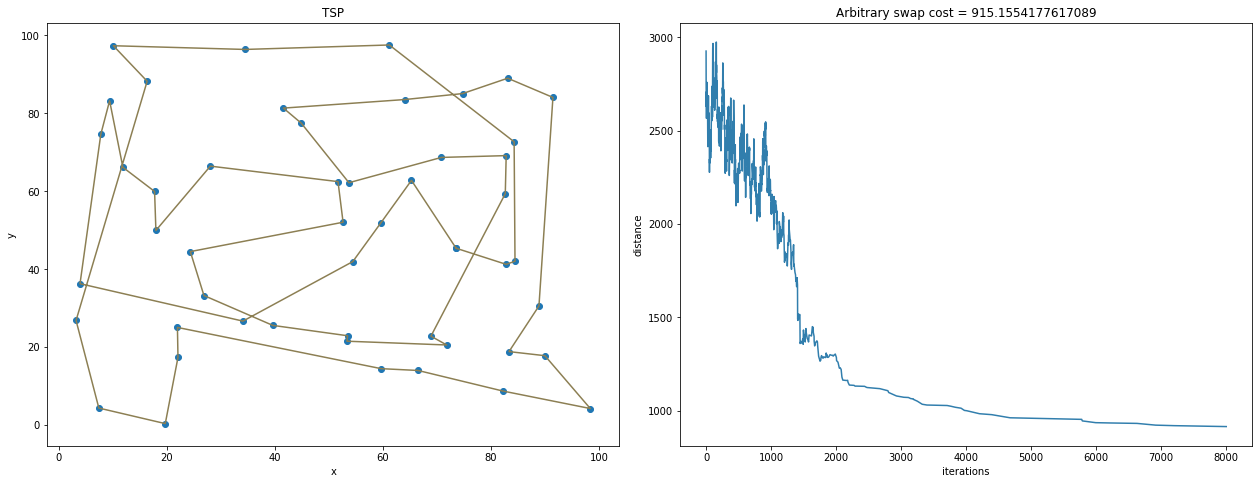

In [10]:
t_max = 300
multiplier = 0.998
iterations = 8000

a = Simulated_Annealing(50,100,'uniform')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 50
- rozkład normalny

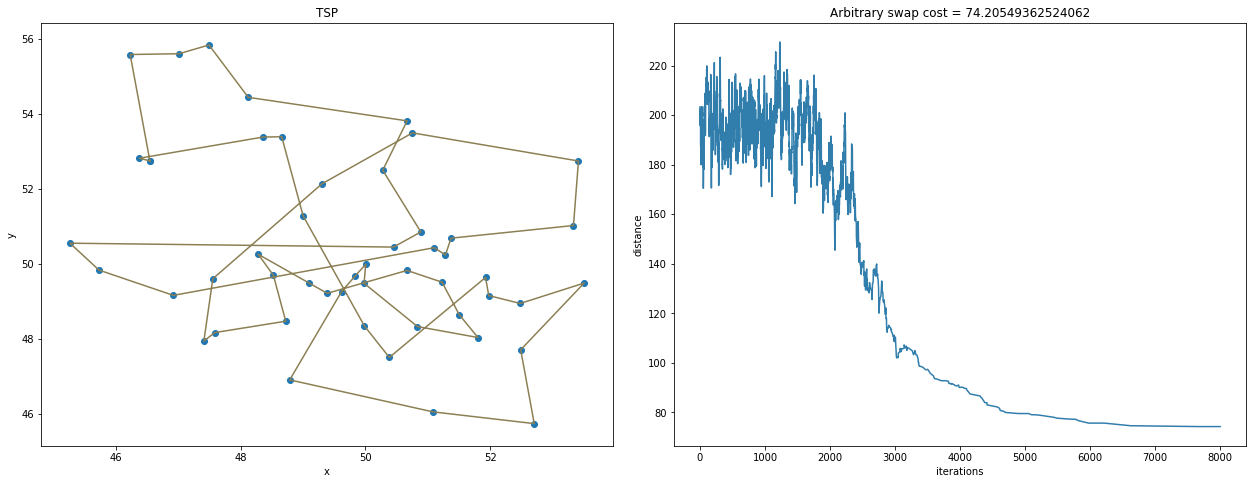

In [11]:
t_max = 300
multiplier = 0.998
iterations = 8000

a = Simulated_Annealing(50,100,'normal')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

- N = 50
- 9 grup punktów

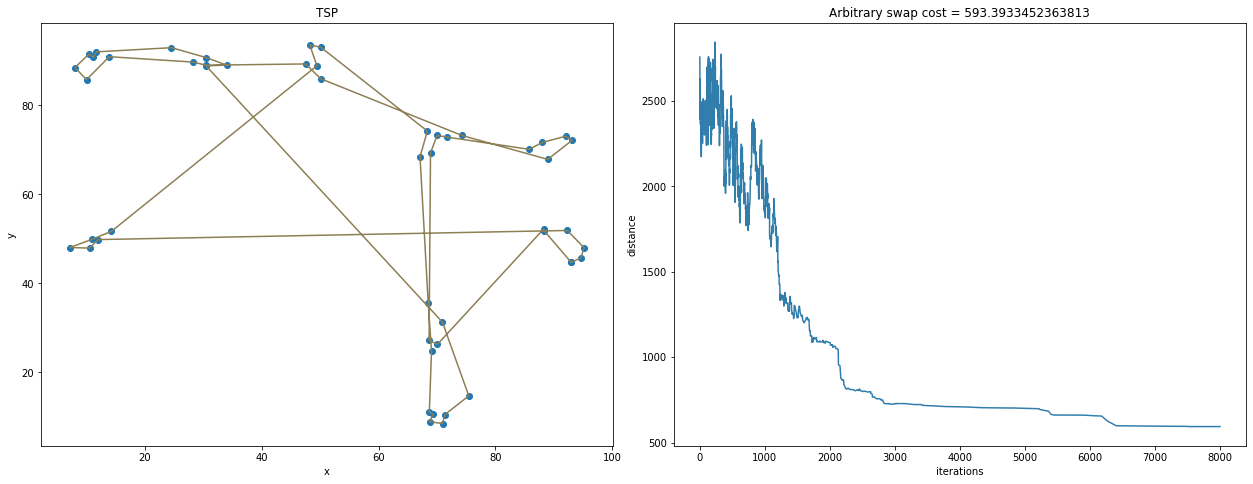

In [12]:
t_max = 300
multiplier = 0.998
iterations = 8000

a = Simulated_Annealing(50,100,'------')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

## Wnioski:
- Otrzymane wyniki są dobre, dla niedużej liczby punktów nawet bardzo dobre

### Zbadaj wpływ sposobu generacji sąsiedniego stanu oraz początkowej wartości temperatury na zbieżność procesu optymalizacji.
- consecutive swap - zamiana kolejności losowej pary połączonych wierzchołków w ścieżce
- arbitrary swap - zamiana dwóch losowych wierzchołków w ścieżce

W celu badania przyjmę N=50

Zbadam dla trzech rozkładów a na końcu podsumuję.

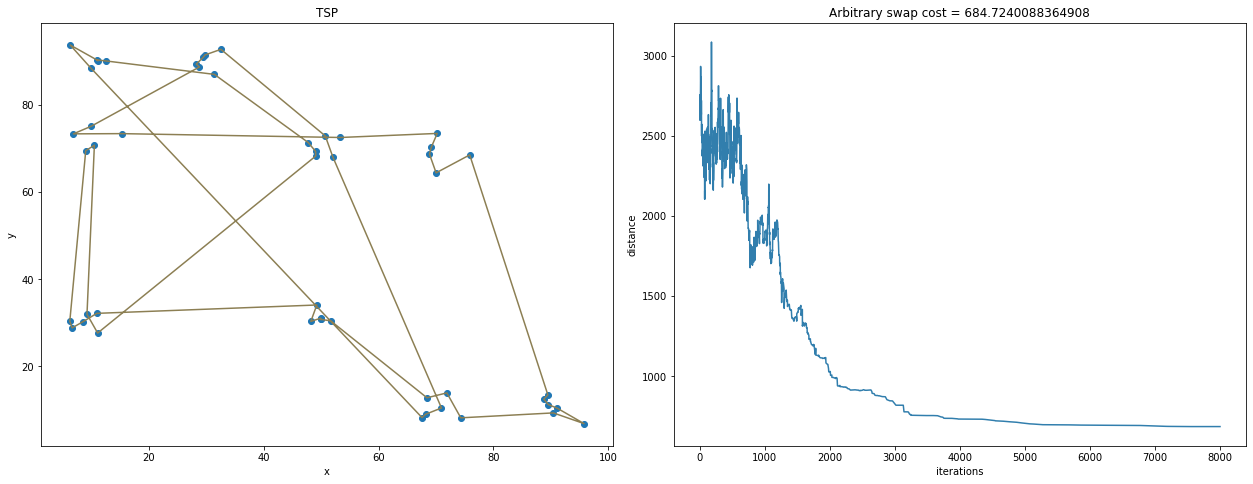

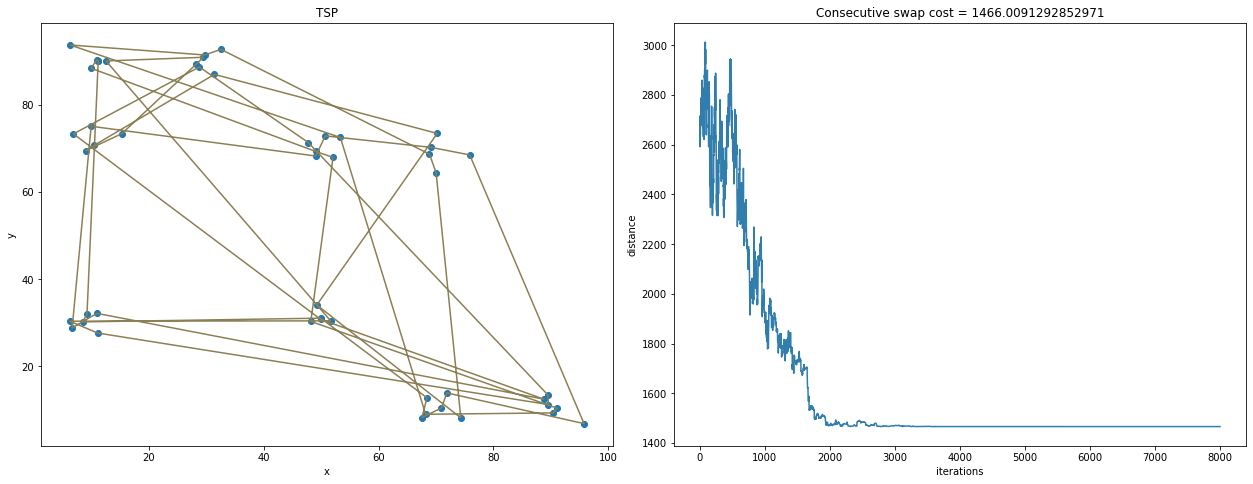

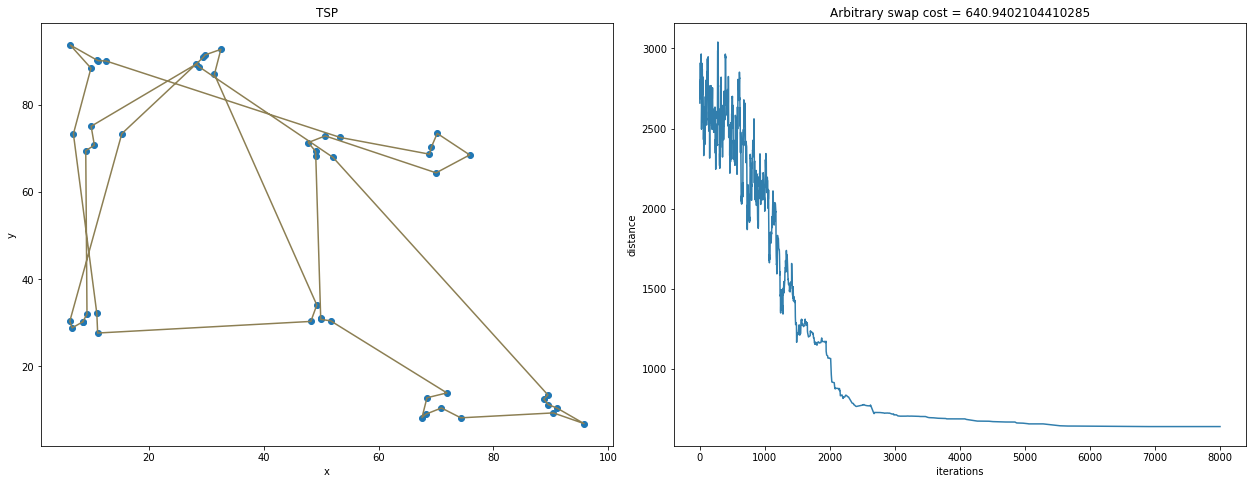

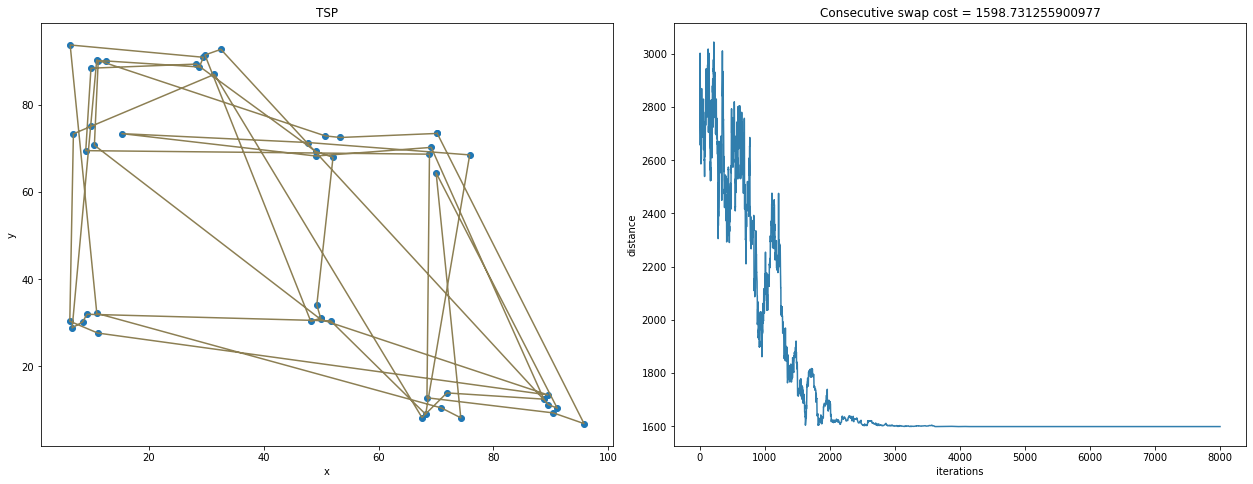

In [13]:
t_max = 300
multiplier = 0.998
iterations = 8000

a = Simulated_Annealing(50,100,'------')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()
a.clean()
a.set_consecutive_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

t_max = 500
a.clean()

a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()
a.clean()
a.set_consecutive_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

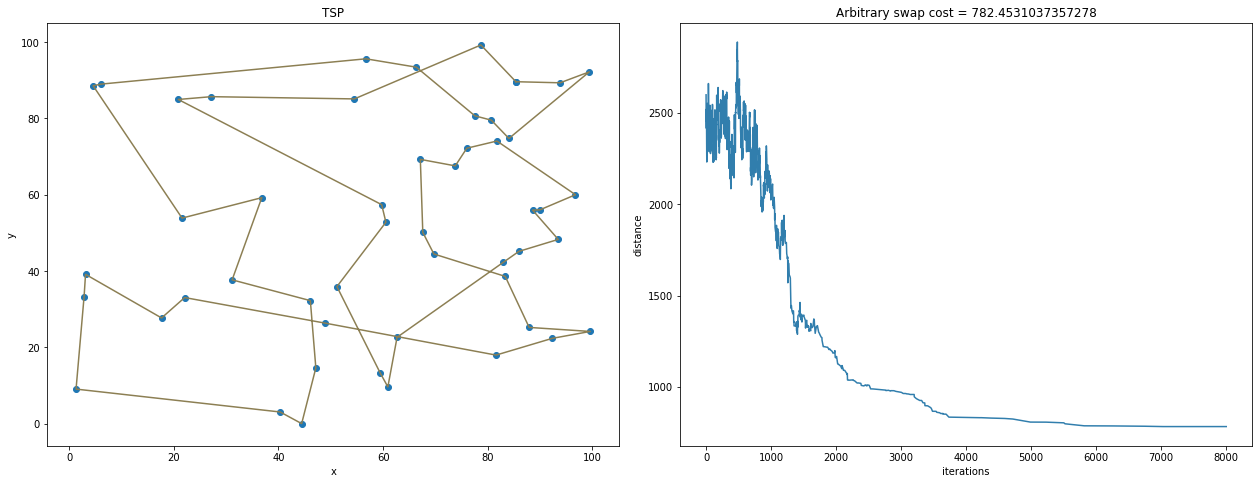

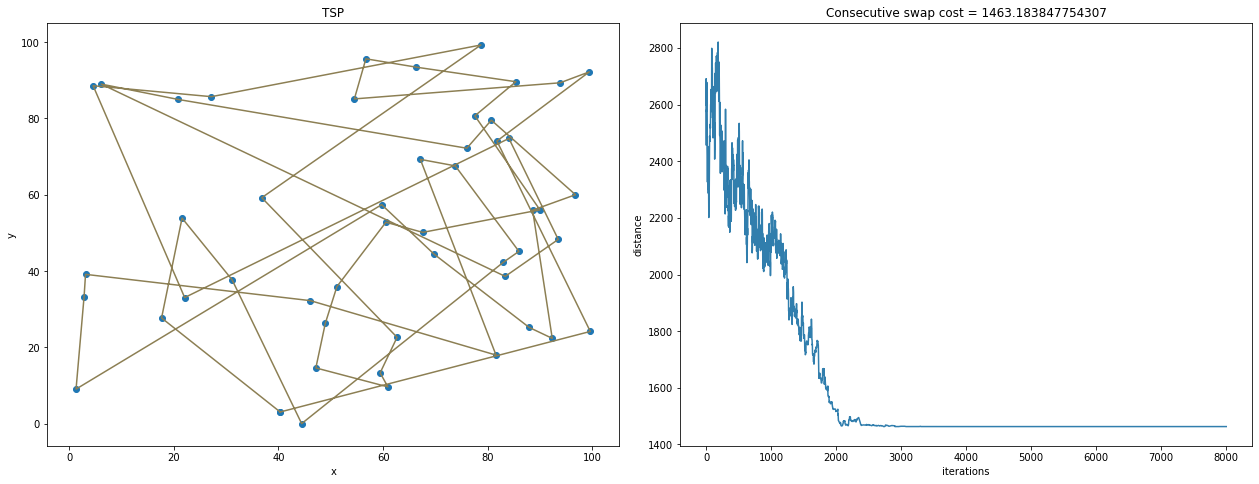

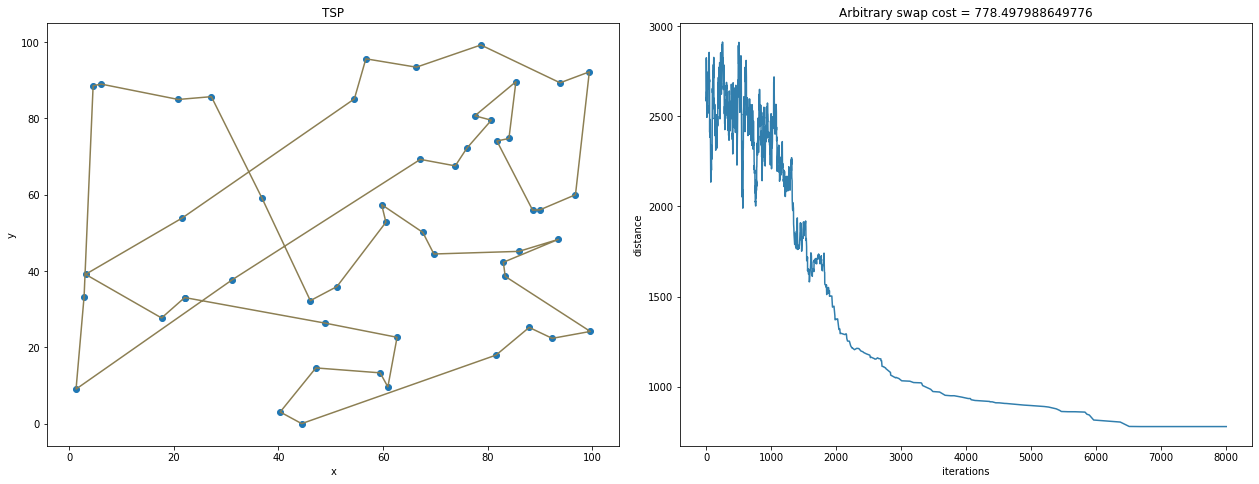

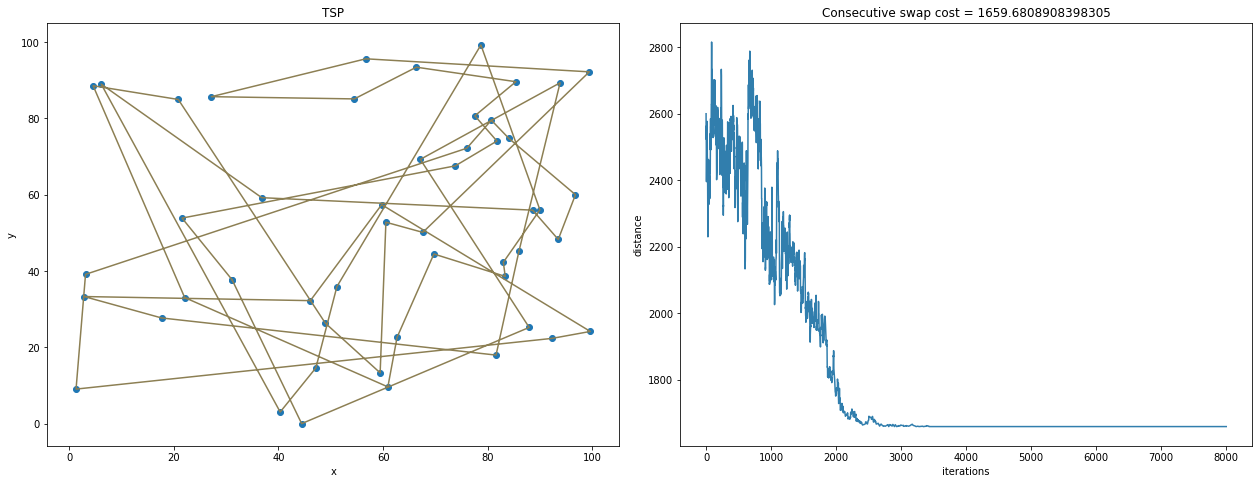

In [14]:
t_max = 300
multiplier = 0.998
iterations = 8000

a = Simulated_Annealing(50,100,'uniform')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()
a.clean()
a.set_consecutive_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

t_max = 500
a.clean()

a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()
a.clean()
a.set_consecutive_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

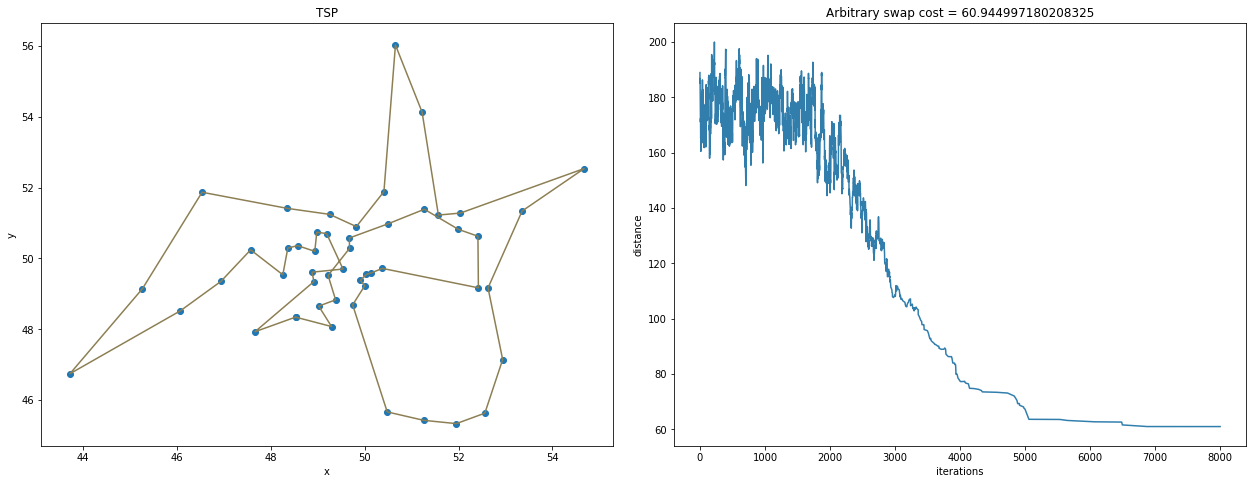

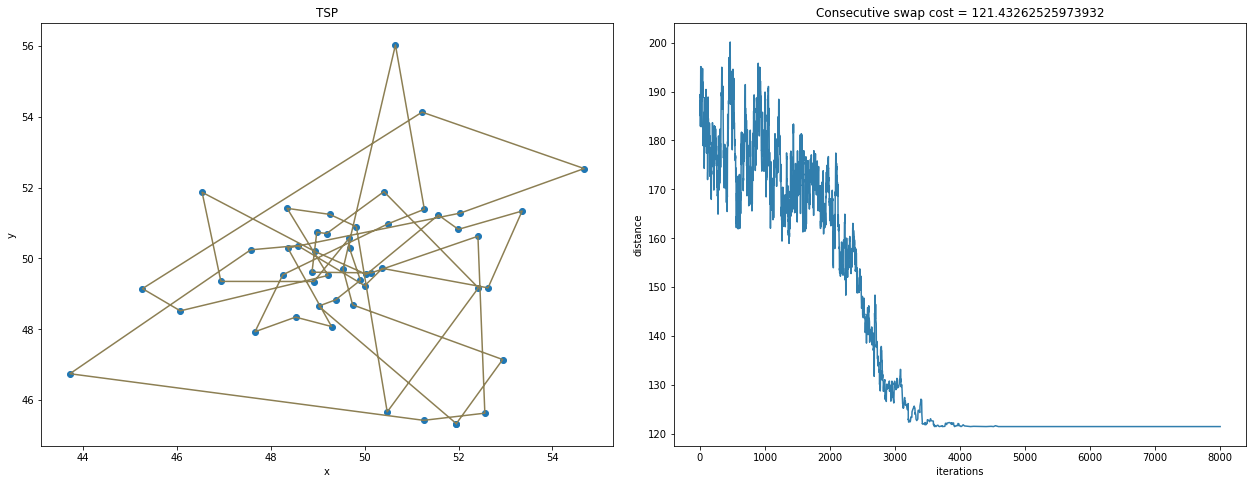

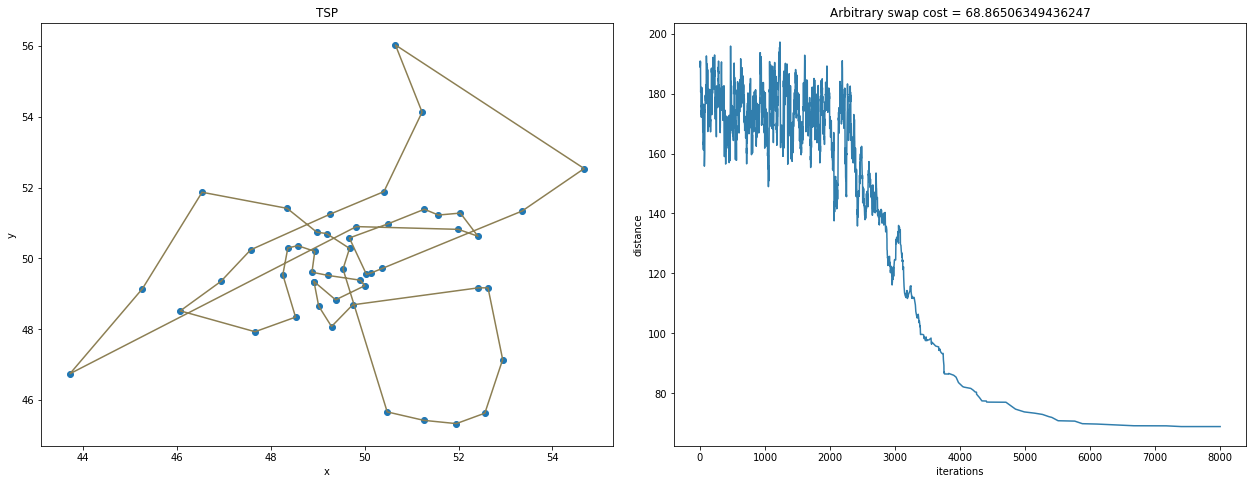

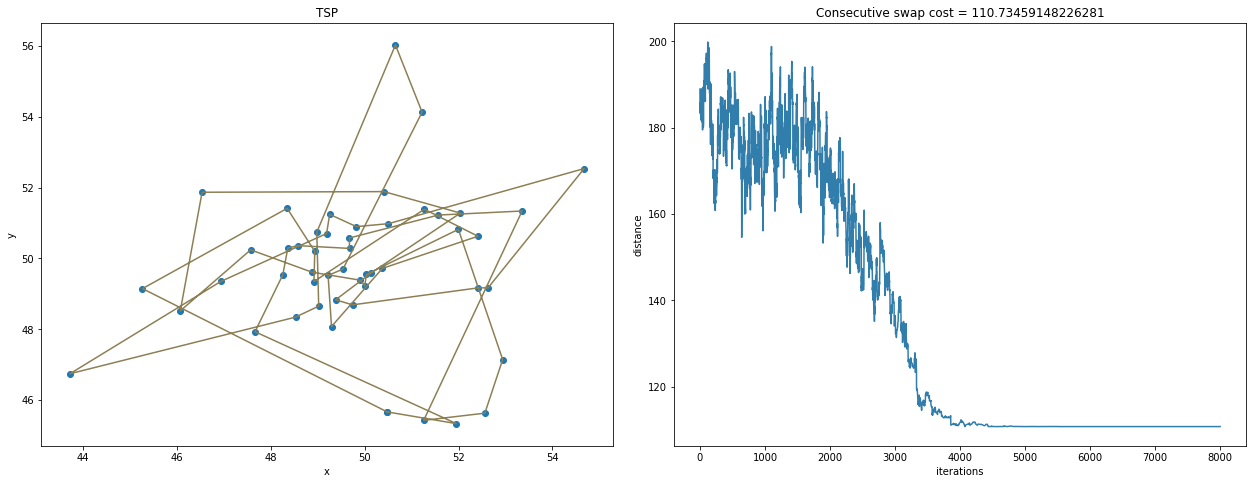

In [15]:
t_max = 300
multiplier = 0.998
iterations = 8000

a = Simulated_Annealing(50,100,'normal')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()
a.clean()
a.set_consecutive_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

t_max = 500
a.clean()

a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()
a.clean()
a.set_consecutive_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

Na ten moment napewno widać że arbitrary swap daje dużo lepsze wyniki, przyjrzę się jeszcze dokładniej wpływowi temperatury.

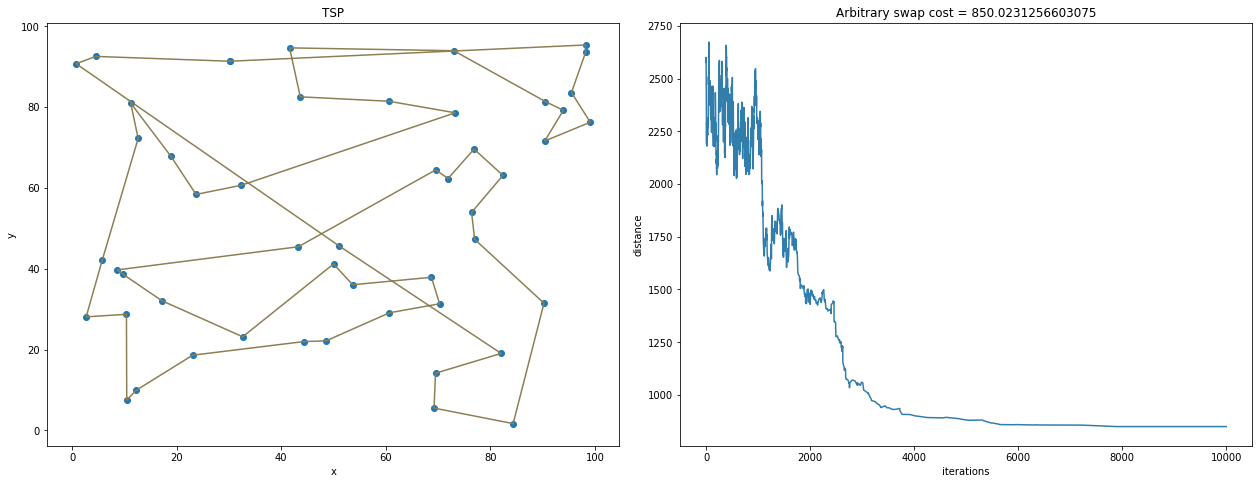

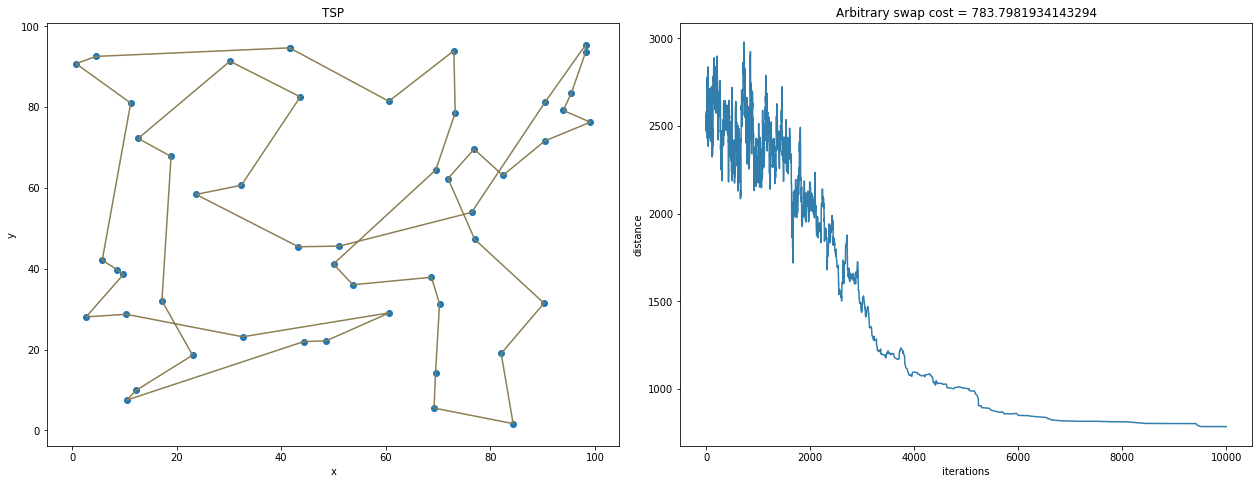

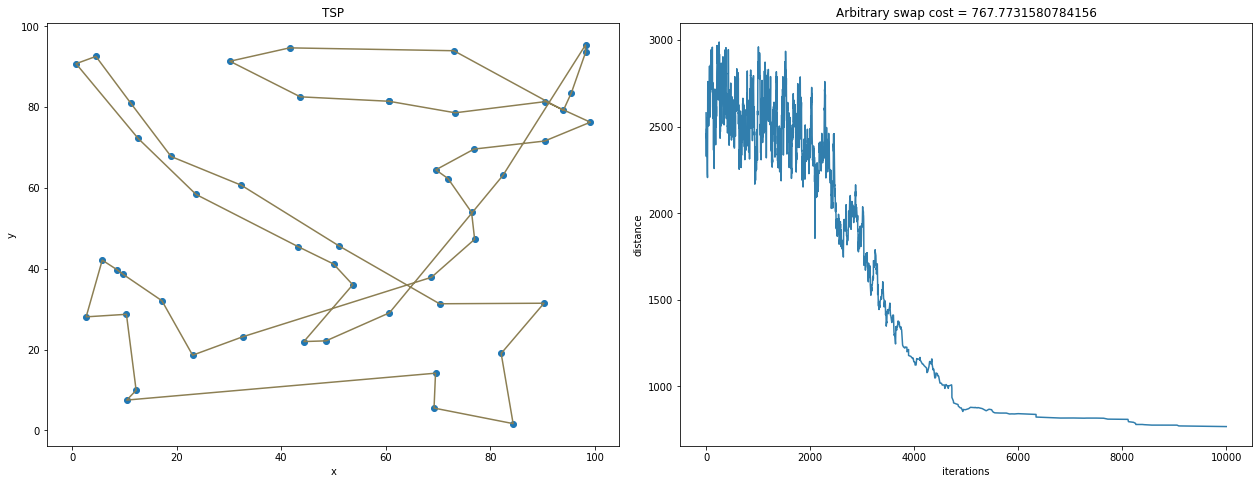

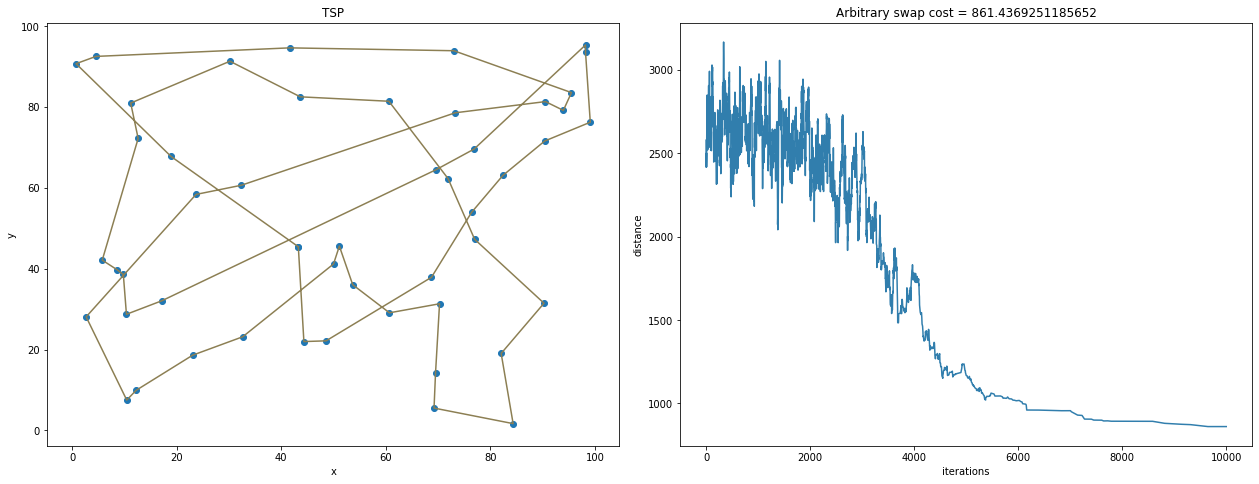

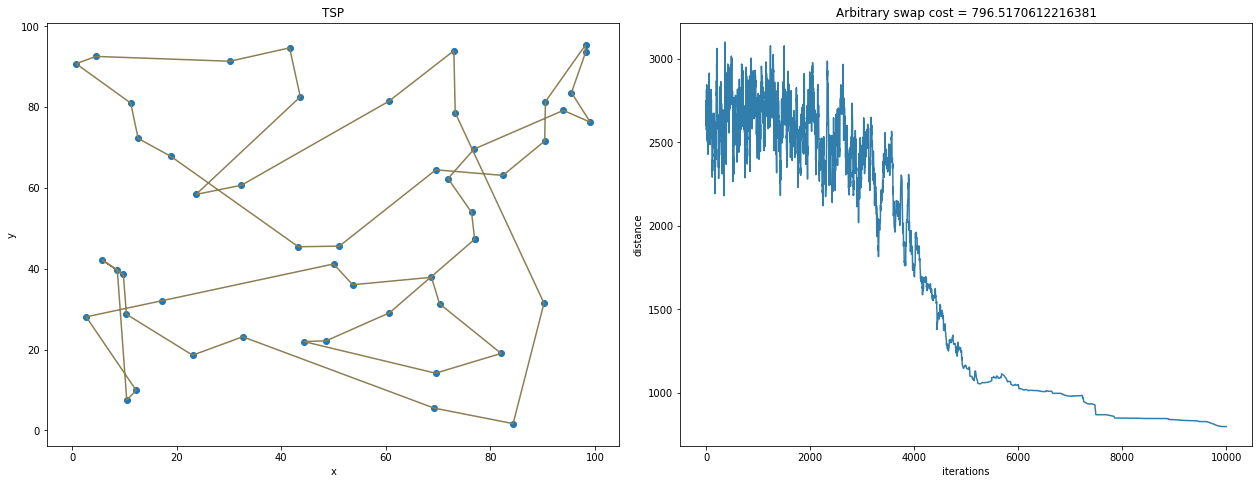

In [16]:
t_max = 100
multiplier = 0.999
iterations = 10000

a = Simulated_Annealing(50,100,'uniform')
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

a.clean()

t_max = 300
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

a.clean()

t_max = 600
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

a.clean()

t_max = 1000
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

a.clean()

t_max = 1600
a.set_arbitrary_swap(True)
a.annealing(t_max, multiplier, iterations)
a.draw_plot()

## Wnioski:
- Arbitrary swap zawsze daje dużo lepsze wyniki niż consecutive swap.
- Jeśli zapewniamy dużo iteracji i odpowiedni mnożnik to początkowa wartość temperatury ( o ile nie jest jakoś bardzo mała) nie ma większego znaczenia, lecz jeżeli liczba iteracji jest zbyt mała co do wielkości mnożnika to temperatura maleje bardzo powoli i czym większa początkowa wartość temperatury tym gorszy wynik.